In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import desc

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Hawaii = Base.classes.keys()
Hawaii

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
recent_date

('2017-08-23',)

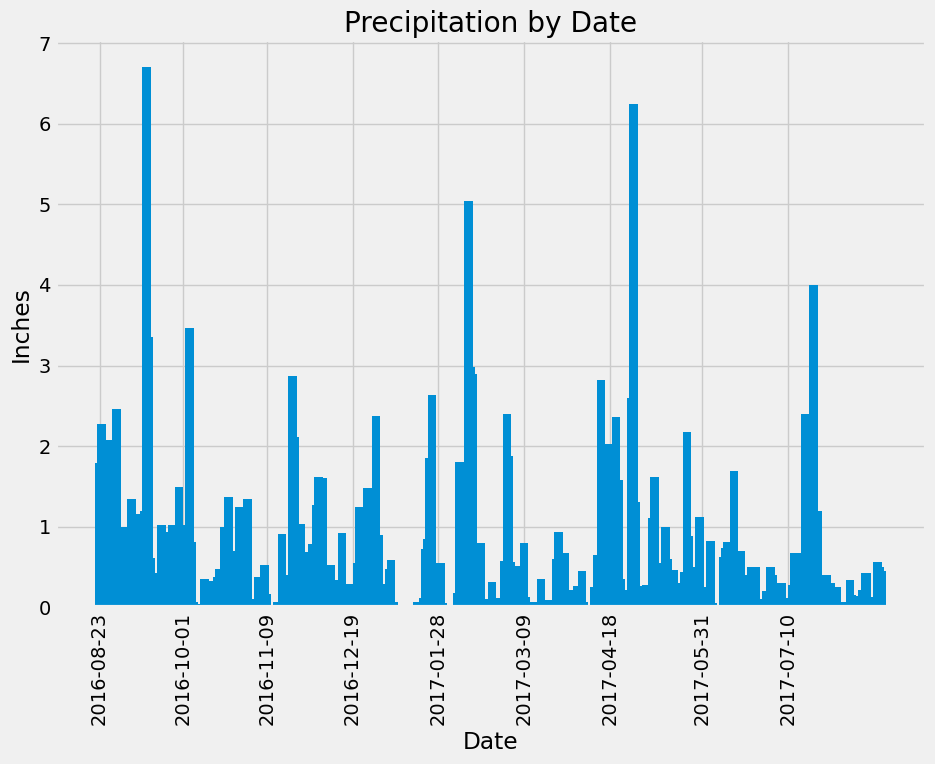

In [14]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
"""2017-08-23"""
# Calculate the date one year from the last date in data set.
year_ago = dt.datetime(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
precipitation_data = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= '2016-08-23').all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
precipitation = pd.DataFrame(precipitation_data, columns=['Date', 'Precipitation'])

# Sort the dataframe by date
precipitation_sort_date = precipitation.sort_values('Date')

# Use Pandas Plotting with Matplotlib to plot the data
x = precipitation_sort_date.Date
height = precipitation_sort_date.Precipitation
plt.figure(figsize=(10,7))
plt.bar(x = x, height = height, width = 4)
plt.xlabel('Date')
plt.ylabel('Inches')
plt.title('Precipitation by Date')
plt.xticks(x[::250],  rotation='vertical')
plt.show()

In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data
precipitation_sort_date['Precipitation'].describe()

count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: Precipitation, dtype: float64

# Exploratory Station Analysis

In [ ]:
# Design a query to calculate the total number of stations in the dataset
stations = session.query(func.count(Station.station)).scalar()
stations

In [ ]:
active_stations = session.query(Measurement.station).group_by(Measurement.station).all()
active_stations

In [ ]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_stations = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
active_stations

In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).filter(Measurement.station == 'USC00519523').all()
most_active_station

In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temperature_data = session.query(Measurement.station, Measurement.tobs).filter(Measurement.date >= '2016-08-23')\
                                    .filter(Measurement.date <= '2017-08-23')\
                                    .filter(Measurement.station == 'USC00519523').all()
temperature = pd.DataFrame(temperature_data, columns=['Station', 'Tobs'])

# Use Pandas Plotting with Matplotlib to plot the data
x = temperature.Tobs
plt.figure(figsize=(10,8))
plt.hist(x, bins=12)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Temperatures for USC00519523')
plt.tight_layout()
plt.show()

# Close Session

In [ ]:
# Close Session
session.close()